In [132]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("automobile.txt")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [133]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [134]:
df.drop('symboling',axis=1, inplace=True)
df.drop('normalized-losses',axis=1, inplace=True)
df.drop('aspiration',axis=1, inplace=True)
df.drop('engine-location',axis=1, inplace=True)
df.drop('drive-wheels',axis=1, inplace=True)
df.drop('wheel-base',axis=1, inplace=True)
df.drop('curb-weight',axis=1, inplace=True)
df.drop('engine-size',axis=1, inplace=True)
df.drop('fuel-system',axis=1, inplace=True)
df.drop('bore',axis=1, inplace=True)
df.drop('stroke',axis=1, inplace=True)
df.drop('compression-ratio',axis=1, inplace=True)
df.drop('peak-rpm',axis=1, inplace=True)
df.drop('num-of-doors',axis=1, inplace=True)

In [135]:
df = df[df['horsepower'] != '?']
df = df[df['price'] != '?']

df = df.drop_duplicates()

df


,make,fuel-type,body-style,length,width,height,engine-type,num-of-cylinders,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,convertible,168.8,64.1,48.8,dohc,four,111,21,27,13495
1,alfa-romero,gas,convertible,168.8,64.1,48.8,dohc,four,111,21,27,16500
2,alfa-romero,gas,hatchback,171.2,65.5,52.4,ohcv,six,154,19,26,16500
3,audi,gas,sedan,176.6,66.2,54.3,ohc,four,102,24,30,13950
4,audi,gas,sedan,176.6,66.4,54.3,ohc,five,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,sedan,188.8,68.9,55.5,ohc,four,114,23,28,16845
201,volvo,gas,sedan,188.8,68.8,55.5,ohc,four,160,19,25,19045
202,volvo,gas,sedan,188.8,68.9,55.5,ohcv,six,134,18,23,21485
203,volvo,diesel,sedan,188.8,68.9,55.5,ohc,six,106,26,27,22470


In [136]:
df['price'] = df['price'].astype('int')
df['horsepower'] = df['horsepower'].astype('int')
df['city-mpg'] = df['city-mpg'].astype('int')
df['highway-mpg'] = df['highway-mpg'].astype('int')

<AxesSubplot:xlabel='make'>

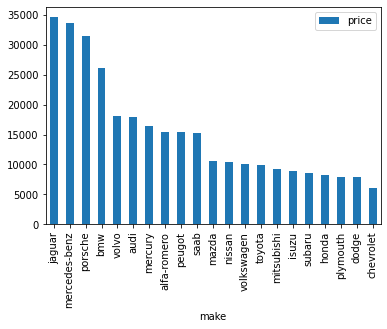

In [137]:
# Which make has the highest average price
group_make = df.groupby('make')

make = round(group_make.mean(), 2)

make = pd.DataFrame({'price' : make['price']
                    })

make = make.sort_values(by='price', ascending = False)

make.rename(columns={'make': 'price'}, inplace=True)

make.plot(kind='bar')

The results are as i expected with jaguar mercedes and porsche with the highest average price and cheverolet at the bottom

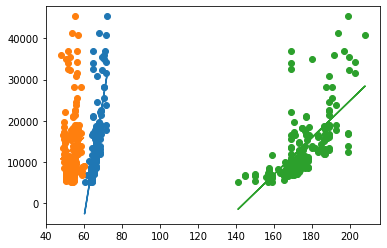

In [138]:
# Which change in width, length or height affects price more 
size = pd.DataFrame({'width': df['width'],
                      'height': df['height'],
                     'price': df['price'],                     
                      'length': df['length']})


# WIDTH - ORANGE
x =size['width']
y =size['price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)


# HEIGHT - BLUE
x =size['height']
y =size['price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)


# LENGTH - GREEN
x =size['length']
y =size['price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)

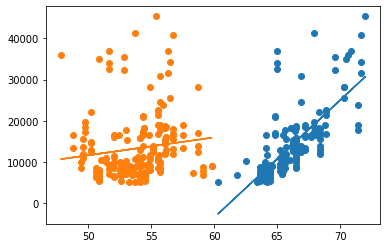

In [139]:
# WIDTH - ORANGE
x =size['width']
y =size['price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)


# HEIGHT - BLUE
x =size['height']
y =size['price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)


The line with the sharpest upwards gradient is height making it the factor that affects price the most out of the 3

<AxesSubplot:xlabel='fuel-type'>

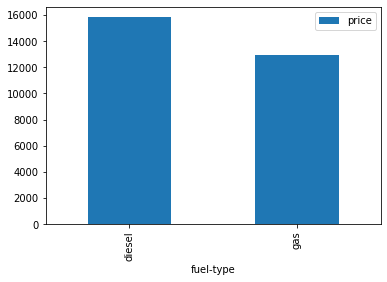

In [140]:
# which fuel type affects price more
group_fuel = df.groupby('fuel-type')

fuel = round(group_fuel.mean(), 2)

fuel = pd.DataFrame({'price' : fuel['price']
                    })

fuel = fuel.sort_values(by='price', ascending = False)

fuel.rename(columns={'fuel_type': 'price'}, inplace=True)

fuel.plot(kind='bar')

Diesel cars are on average more expensive than gas cars

<AxesSubplot:xlabel='body-style'>

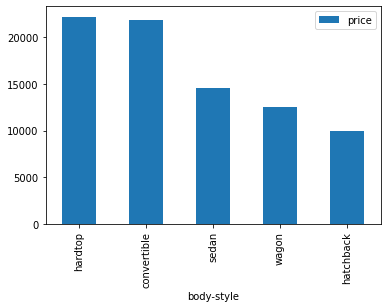

In [141]:
# which body type affects price more
group_body = df.groupby('body-style')

body = round(group_body.mean(), 2)

body = pd.DataFrame({'price' : body['price']
                    })

body = body.sort_values(by='price', ascending = False)

body.rename(columns={'body_type': 'price'}, inplace=True)

body.plot(kind='bar')

Funnily enough the 2 opposites hardtops and convertible are the most expensive while hatchbacks are the cheapest

<AxesSubplot:xlabel='engine-type'>

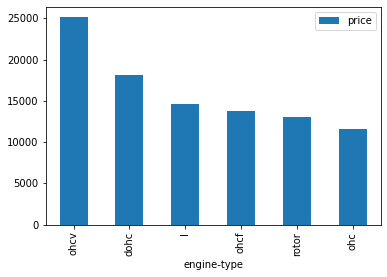

In [142]:
# which engine-type affects price more
group_engine = df.groupby('engine-type')

engine = round(group_engine.mean(), 2)

engine = pd.DataFrame({'price' : engine['price']
                    })

engine = engine.sort_values(by='price', ascending = False)

engine.rename(columns={'engine_type': 'price'}, inplace=True)

engine.plot(kind='bar')

The ohcv has by far the highest average price at over 25000 and ohc with the least with half of the highest average 

<AxesSubplot:xlabel='num-of-cylinders'>

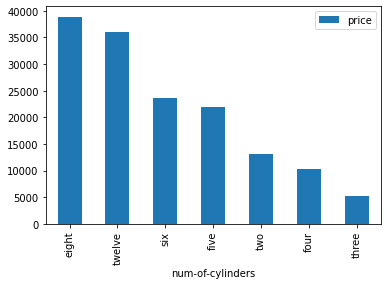

In [143]:
# which num-of-cylinders affects price more
group_cylinders = df.groupby('num-of-cylinders')

cylinders = round(group_cylinders.mean(), 2)

cylinders = pd.DataFrame({'price' : cylinders['price']
                    })

cylinders = cylinders.sort_values(by='price', ascending = False)

cylinders.rename(columns={'cylinders': 'price'}, inplace=True)

cylinders.plot(kind='bar')

Cars with 8 cylinders have the highest average price and three with the least. The general trend is the more cylinders the higher the average price

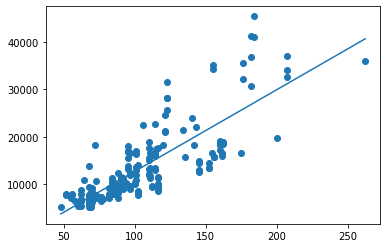

In [144]:
# Is there a relationship between horsepower and price and if so what is it
horsepower = pd.DataFrame({'price': df['price'],                     
                      'horsepower': df['horsepower']})

horsepower = horsepower.sort_values(by='horsepower', ascending = True)
# WIDTH - ORANGE
x =horsepower['horsepower']
y =horsepower['price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)

There is and generally, the higher the horsepower the higher the price

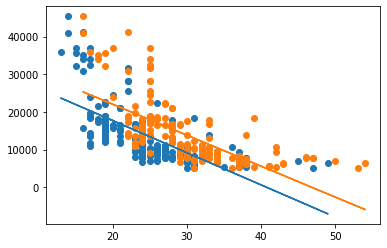

In [145]:
# Which mpg affects price more 
mpg = pd.DataFrame({'city-mpg': df['city-mpg'],
                     'price': df['price'],                     
                      'highway-mpg': df['highway-mpg']})


# CITY - blue
x =mpg['city-mpg']
y =mpg['price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)


# HIGHWAY - orange
x =mpg['highway-mpg']
y =mpg['price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)




Unexpectedly, the most expensive cars are the least fuel efficient and the cheapest are the most fuel efficient. Cars are also more fuel efficient on the highway. The 2 lines of best fit are also almost parrallel meaning they have the same effect on price